In [1]:
%matplotlib inline

In [14]:
import fiona
import rasterio
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import kendalltau

(pandarus) cmutel🚲  bw2-lcimpact ➔ ls
CHANGES.md			kmeans.6.gpkg
LICENSE.txt			kmeans.7.gpkg
MANIFEST.in			kmeans.8.gpkg
README.rst			requirements.txt
Untitled-Copy1.ipynb		setup.py
Untitled-Copy2.ipynb		water_eq_core.10.tif
Untitled-Copy3.ipynb		water_eq_core.20.tif
Untitled-Copy4.ipynb		water_eq_core.5.tif
Untitled-Copy5.ipynb		water_eq_core.6.tif
Untitled.ipynb			water_eq_core.7.tif
Untitled1.ipynb			water_eq_core.8.tif
bw2_lcimpact			water_eq_core.9.tif
dev				water_eq_core.discretized.tif
kmeans.10.gpkg			water_eq_core.muchreduced.tif
kmeans.10.gpkg-shm		water_eq_core.reduced.tif
kmeans.10.gpkg-wal		water_eq_core.tif
kmeans.5.gpkg

In [3]:
indices = (5, 6, 7, 8, 10)

In [4]:
source = ('/Users/cmutel/Box Sync/LC-Impact (Chris Mutel)/12-water consumption/spatial layers EQ'
          '/shapefiles/CF_CORE_plants_noVS_and_animals_inclVS_noCpA_Option3_SW_PDF_perm3.tif')

with rasterio.open(source) as src:
    source_array = src.read(1)

In [8]:
def feature_count(index):
    fp = "kmeans.{}.gpkg".format(index)
    with fiona.open(fp) as src:
        l = len(src)
    return l
        
for index in indices:
    print(index, feature_count(index))

5 14787
6 19533
7 19224
8 14302
10 31537


In [32]:
with rasterio.open("water_eq_core.10.tif") as src:
    array = src.read(1, masked=True)

mask = ~array.mask | (array.data > 0)

In [33]:
array[mask].shape, array.shape, source_array[mask].shape, source_array.shape

((6021720,), (2786, 7200), (6021720,), (2786, 7200))

In [34]:
np.histogram(array[mask])

(array([5675026,       0,       0,       0,       0,       0,       0,
              0,       0,  346694]),
 array([  6.77245921e-17,   5.51165340e-13,   1.10226296e-12,
          1.65336057e-12,   2.20445819e-12,   2.75555580e-12,
          3.30665342e-12,   3.85775103e-12,   4.40884865e-12,
          4.95994626e-12,   5.51104388e-12]))

In [37]:
np.unique(array[mask]).shape

(10,)

In [21]:
def plot_index(index):
    with rasterio.open("water_eq_core.{}.tif".format(index)) as src:
        array = src.read(1, masked=True)
        
    mask = ~array.mask | (array.data != 0)
    
    df = pd.DataFrame({
        'original': source_array[mask],
        'clustered': array.data[mask]
    })
    sns.jointplot('original', 'clustered', data=df, size=8, kind='scatter')

In [43]:
def plot_index2(index):
    with rasterio.open("water_eq_core.{}.tif".format(index)) as src:
        array = src.read(1, masked=True)
        
    mask = ~array.mask | (array.data > 0)
    
    df = pd.DataFrame({
        'original': np.log(source_array[mask].astype(np.float64)),
        'clustered': np.log(array.data[mask].astype(np.float64))
    })
    
    sns.jointplot('original', 'clustered', data=df, size=8, kind='hex')

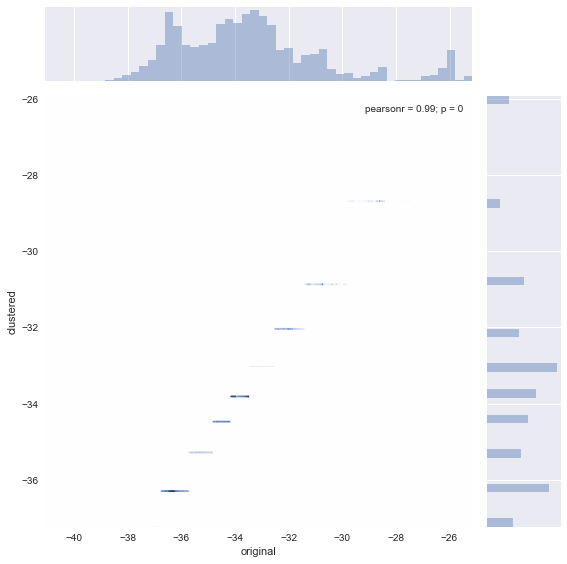

In [44]:
plot_index2(10)

In [50]:
error = np.abs(array[mask] - source_array[mask]) / source_array[mask]

In [51]:
error_mask = error < 10
print((~error_mask).sum(), error.shape)

4250 (6021720,)


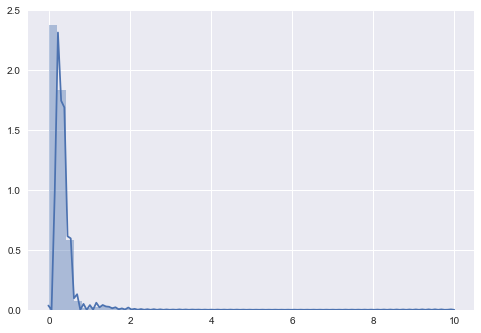

In [52]:
sns.distplot(error[error_mask])